# Investigating the differences between different BT-Settl models.


In [1]:
from spectrum_overload import Spectrum

import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string
import numpy as np
from astropy.io import fits

from astro_scripts.plot_fits import get_wavelength, ccf_astro, vac2air
from loading_phoenix import load_phoenix_aces, load_Allard_Phoenix, align2model, phoenix_readUnit7

%matplotlib inline

In [2]:
# Need 2 convolve to same resolution
from convolve_spectrum import ip_convolution
R = 10000

As we are mostly interested in the NIR I will limit the synthetic models to 1000-3000nm. This removes many large differences at the blue optical end.

# BT-Settl Differences
GNS93: using the Grevesse, Noels & Sauval (1993) solar abundances

AGSS2009: using the Asplund et al. (2009) solar abundances

CIFIST2011: using the Caffau et al. (2011) solar abundances

CIFIST2011b: accounting also for a calibration of the mixing length based on
RHD simulations by Freytag et al. (2010).

CIFIST2011bc: accounting for the calibration of the mixing length based on
RHD simulations by Freytag et al. (2010). Additonal adjustments to the MLT
equations are taken into account.

CIFIST2011_2015: published version of the BT-Settl grid (Baraffe et al. 2015,
Allard et al. 2015 in preparation).  This grid will be the most complete
of the CIFIST2011 grids above, but currently: Teff= 1200 - 7000K, logg=2.5 - 5.5, 
[M/H]= 0.0. 


In [3]:
# Need to unzip .xz and b2z files
CIFIST2011_2015 = "BT-Settl-abundances/CIFIST2011_2015_lte026.0-4.5-0.0a+0.0.BT-Settl.spec.7"
CIFIST2011 =  "BT-Settl-abundances/CIFIST2011_2015_lte026.0-4.5-0.0a+0.0.BT-Settl.spec.7"
#GNS93 = "BT-Settl-abundances/GNS93lte026-4.5-0.0.BT-Settl.7.gz"
GNS93 = "BT-Settl-abundances/lte26.0-4.50-0.0.BT-cond-giant-2009.l128.gn.7"
AGSS09 = "BT-Settl-abundances/AGSS09lte026-4.5-0.0a+0.0.BT-Settl.7"


100%|██████████| 18299/18299 [00:00<00:00, 20461.83it/s]


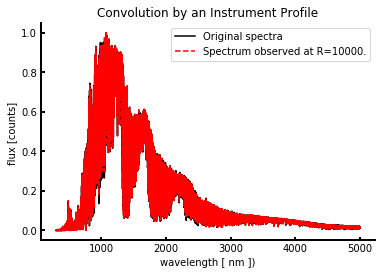

In [4]:
gn93 = load_Allard_Phoenix(GNS93)

gn93r = ip_convolution(gn93[0], gn93[1], [min(gn93[0]), max(gn93[0])], R=R)

100%|██████████| 307548/307548 [01:14<00:00, 4129.97it/s]


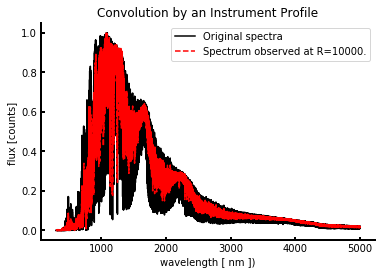

In [ ]:
agss09 = load_Allard_Phoenix(AGSS09)
agss09r = ip_convolution(agss09[0], agss09[1], [min(agss09[0]), max(agss09[0])], R=R)

In [ ]:
cifist11 = load_Allard_Phoenix(CIFIST2011)
cifist11r = ip_convolution(cifist11[0], cifist11[1], [min(cifist11[0]), max(cifist11[0])], R=R)

100%|██████████| 944999/944999 [14:47<00:00, 1065.12it/s] 


In [ ]:
cifist11_15 = load_Allard_Phoenix(CIFIST2011_2015)
cifist11_15r = ip_convolution(cifist11_15[0], cifist11_15[1], [min(cifist11_15[0]), max(cifist11_15[0])], R=R)

In [ ]:
# Full specturm
plt.figure(figsize=(15,8))
plt.plot(cifist11[0], cifist11[1], label="CIFIST2011")
plt.plot(cifist11_15[0], cifist11_15[1], label="CIFIST2011_2015")
plt.plot(agss09[0], agss09[1], label="AGSS09")
plt.plot(gn93[0], gn93[1], label="GN93")
plt.legend()
plt.title("Comparing BT-Settl Abundances\nTeff=2600K logg=4.5, Fe/H=0.0")
plt.show()

In [ ]:

plt.figure(figsize=(15,8))
plt.plot(cifist11[0], cifist11[1], label="CIFIST2011")
plt.plot(cifist11_15[0], cifist11_15[1], label="CIFIST2011_2015")
plt.plot(agss09[0], agss09[1], label="AGSS09")
plt.plot(gn93[0], gn93[1], label="GN93")
plt.legend()
plt.xlim([2000, 4000])
plt.ylim([0,110000])
plt.title("Comparing BT-Settl Abundances\nTeff=2600K logg=4.5, Fe/H=0.0")
plt.show()

In [ ]:
plt.plot(cifist11[0], cifist11[1], label="CIFIST2011")
plt.plot(cifist11_15[0], cifist11_15[1], label="CIFIST2011_2015")
plt.plot(agss09[0], agss09[1], label="AGSS09")
plt.plot(gn93[0], gn93[1], label="GN93")
plt.xlim([800,1000])
plt.legend()
plt.show()

In [ ]:
plt.plot(cifist11[0], cifist11[1], label="CIFIST2011")
plt.plot(cifist11_15[0], cifist11_15[1], label="CIFIST2011_2015")
plt.plot(agss09[0], agss09[1], label="AGSS09")
plt.plot(gn93[0], gn93[1], label="GN93")
plt.xlim([2100,2170])
plt.legend()
plt.show()

In [ ]:
plt.plot(cifist11[0], cifist11[1], label="CIFIST2011")
plt.plot(cifist11_15[0], cifist11_15[1], label="CIFIST2011_2015")
plt.plot(agss09[0], agss09[1], label="AGSS09")
plt.plot(gn93[0], gn93[1], label="GN93")
plt.xlim([1100,1200])
plt.legend()
plt.show()

In [ ]:

plt.plot(cifist11_15[0], cifist11_15[1], label="CIFIST2011_2015")
plt.xlim([1100,1120])
plt.legend()
plt.show()

In [ ]:
plt.plot(agss09[0], agss09[1], label="AGSS09")
plt.xlim([1100,1120])
plt.legend()
plt.show()

In [ ]:
# GN93 models are lower resolution
plt.plot(gn93[0], gn93[1], label="GN93")

plt.xlim([1100,1120])
plt.legend()
plt.show()

In [ ]:

plt.plot(cifist11[0], cifist11[1], label="CIFIST2011")
plt.xlim([1100,1120])
plt.legend()
plt.show()

In [ ]:
# No difference between cifits2001 and cifist 2011-2015 for this temperature anyway
plt.plot(cifist11[0], cifist11_15[1]-cifist11[1], label="Diff CIFIST2015 - CIFIST2011")

plt.legend()
plt.show()

Need to conolve to same resolution to plot the differences here.

In [ ]:

plt.plot(cifist11[0], gn93[1]-cifist11[1], label="Diff gn93-CIFIST11")

plt.legend()
plt.show()

In [ ]:

plt.plot(cifist11[0], agss09[1]-cifist11[1], label="Diff agss09 -CIFIST")

plt.legend()
plt.show()